# 3097S Milestone 1: Sonar chirp pulse simulation and processing #
# Part 2 - 40 kHz ultrasound transducer 

The bandwidth of the 40 kHz transducer was found to be 2 or 2.5 kHz depending if it was a transmitting or recieving transducer. For this report the bandwidth of 2 kHz was used. A value of 6 was used for k as the value 4 did not provide good results.

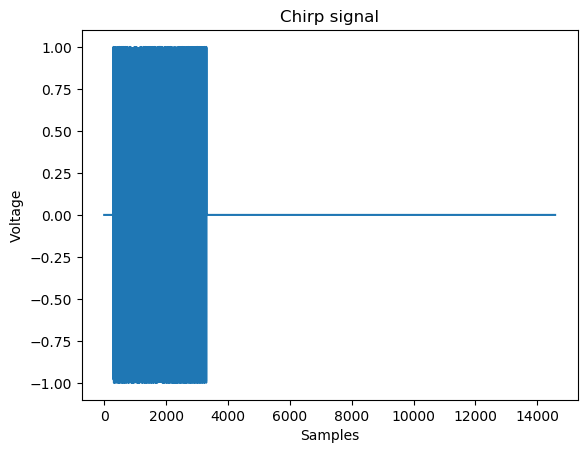

In [2]:
#STEP 1: Chirp pulse creation

c = 343;  # Speed of sound in air in m/s
B = 2000; # Chirp bandwidth
k = 125;
fs = k*B; # This is the sample rate of the sonar.
dt = 1/fs; # This is the sample spacing
r_max = 10; # Maximum range in metres to which to simulate.
t_max = 2*r_max/c; # Time delay to max range

# Create an array containing the time values of the samples
t = collect(0:dt:t_max); # t=0:dt:t_max defines a “range”.
# Create an array containing the range values of the samples
r = c*t/2;
# NOW create the chirp pulse, shifted by an amount td, to start at
# some time td-T/2>0.
f0 = 40000; # Centre frequency is 40 kHz
T = 12E-3; # Chirp pulse length
K = B/T; # Chirp rate
# Define a simple a rect() function which returns for -0.5<=t<=0.5 or 0.
# The function will work if t is an array of values.
rect(t) = (abs.(t) .<= 0.5)*1.0
# rect(t/T) spans the interval [-T/2,T/2]
# We must therefore delay the chirp pulse so that it starts after t=0.
# Shift the chirp pulse by 0.6T units to the right, so that it starts at
0.1*T
td = 0.6*T; # Chirp delay
# Note: one can use the macro “@.” to avoid having to put “.” for arrays:
# @. v_tx = cos( 2*pi*(f0*(t-td) + 0.5*K*(t-td).^2) ).*rect((t-td)/T);
v_tx = cos.( 2*pi*(f0*(t .- td) + 0.5*K*(t .- td).^2) ) .* rect.((t .-td)/T);


using PyPlot; pygui(false) # import plot library
# If not installed, add the package via: using Pkg; Pkg.add("PyPlot");
figure() # Create a new figure
plot(v_tx) # Basic plot, axis labeled in samples
title("Chirp signal")
xlabel("Samples");
ylabel("Voltage");


In [3]:
using FFTW # If not installed do: using Pkg; Pkg.add("FFTW");

V_TX = fft(v_tx); 

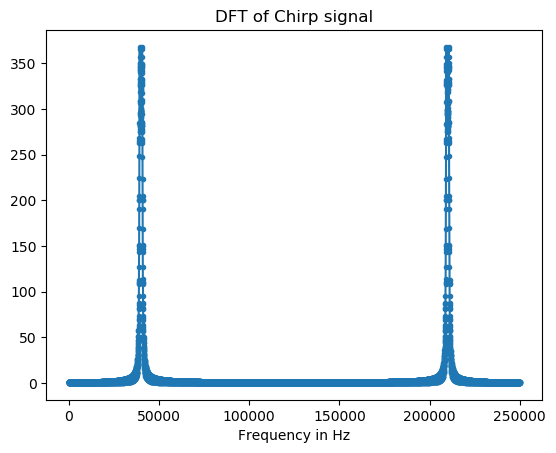

In [4]:
#LABEL frequency axis
N = length(t);
Δf = 1/(N*dt) # spacing in frequency domain
#create array of freq values stored in f_axis. First element maps to 0Hz
f_axis = (0:N-1)*Δf;
figure();
plot(f_axis, abs.(V_TX),".-");
title("DFT of Chirp signal");
xlabel("Frequency in Hz");

In [5]:
R1 was chosen to be the same as part 1. R2 was chosen to be 5m away.

LoadError: syntax: extra token "was" after end of expression

In [17]:
#STEP 2: Point target simulation

R1 = 1.5 + (12-2)/12 # 2.33m - range to target.
td1 = 2*R1/c; # two way delay to target.
A1 = 1/R1^2; # echo voltage signal proportional to 1/R^2
v_rx = A1*cos.( 2*pi*(f0*(t.-td.-td1) + 0.5*K*(t.-td.-td1).^2) ) .* rect((t.-
td.-td1)/T); 
print(v_rx)
V_RX = fft(v_rx);

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0,

, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.

, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0

140645, -0.176018, -0.0529945, 0.117721, 0.182496, 0.0830294, -0.0911646, -0.18331, -0.110466, 0.0618074, 0.178449, 0.134462, -0.0305641, -0.168078, -0.154285, -0.00159604, 0.152532, 0.169335, 0.0336797, -0.132302, -0.179161, -0.0647002, 0.108021, 0.183474, 0.0937076, -0.0804464, -0.182155, -0.119818, 0.0504306, 0.175261, 0.142239, -0.0188979, -0.163015, -0.160296, -0.0131848, 0.145805, 0.173449, 0.0448383, -0.124169, -0.181311, -0.0751005, 0.0987755, 0.183656, 0.103056, -0.0704051, -0.180426, -0.127862, 0.0399255, 0.171735, 0.148777, -0.0082641, -0.157859, -0.165179, -0.0236197, 0.13923, 0.176583, 0.054764, -0.116423, -0.182661, -0.0842335, 0.0901329, 0.183243, 0.111147, -0.0611593, -0.178325, -0.134704, 0.0303776, 0.168069, 0.154208, 0.00128667, -0.152796, -0.169086, -0.0328852, 0.132975, 0.178906, 0.0634758, -0.109209, -0.18339, -0.0921506, 0.0822139, 0.182417, 0.118062, -0.0528008, -0.176031, -0.14045, 0.0218479, 0.164435, 0.158659, 0.00972473, -0.147986, -0.172163, -0.0409827, 0.1

948591, 0.183611, 0.102948, -0.0727076, -0.181274, -0.122567, 0.0492459, 0.175615, 0.139918, -0.0249079, -0.166748, -0.15469, 0.000141733, 0.154845, 0.166623, 0.0245996, -0.140133, -0.175509, -0.0488659, 0.12289, 0.181196, 0.0722181, -0.103437, -0.183592, -0.0942361, 0.0821328, 0.182665, 0.114526, -0.0593692, -0.178442, -0.132729, 0.0355611, 0.171011, 0.148523, -0.0111402, -0.160515, -0.161632, -0.0134533, 0.147154, 0.171832, 0.0377785, -0.131176, -0.17895, -0.0614017, 0.112875, 0.182868, 0.0839044, -0.0925845, -0.183528, -0.10489, 0.070672, 0.18093, 0.123992, -0.0475316, -0.17513, -0.140877, 0.0235765, 0.166242, 0.155256, 0.000767493, -0.154432, -0.166883, -0.0250706, 0.139919, 0.175564, 0.0489058, -0.122967, -0.181156, -0.071857, 0.10388, 0.183571, 0.0935258, -0.0830003, -0.182778, -0.113538, 0.0606971, 0.178803, 0.131552, -0.0373634, -0.171725, -0.147261, 0.013408, 0.161677, 0.1604, 0.0107524, -0.148843, -0.170751, -0.0346995, 0.133455, 0.178146, 0.0580213, -0.115786, -0.182466, -0.

135923, -0.176659, -0.0505073, 0.123361, 0.180686, 0.0673047, -0.109667, -0.183024, -0.0834499, 0.0949763, 0.18366, 0.0987959, -0.0794282, -0.182594, -0.113205, 0.0631708, 0.179846, 0.126547, -0.0463573, -0.175448, -0.138707, 0.0291447, 0.169449, 0.149577, -0.0116925, -0.16191, -0.159064, -0.00583895, 0.152908, 0.167089, 0.0232897, -0.142532, -0.173585, -0.0405019, 0.130881, 0.178501, 0.057321, -0.118068, -0.1818, -0.0735973, 0.104213, 0.183461, 0.0891872, -0.0894455, -0.183475, -0.103954, 0.0739018, 0.181851, 0.117771, -0.0577245, -0.178611, -0.130518, 0.0410602, 0.173791, 0.142088, -0.0240589, -0.167442, -0.152384, 0.00687252, 0.159627, 0.161322, 0.0103468, -0.150422, -0.16883, -0.0274479, 0.139914, 0.174848, 0.0442815, -0.128202, -0.179331, -0.0607023, 0.115392, 0.182249, 0.0765695, -0.101602, -0.183582, -0.0917482, 0.0869559, 0.183328, 0.106111, -0.071584, -0.181495, -0.119538, 0.0556219, 0.178108, 0.131918, -0.0392095, -0.173203, -0.143151, 0.0224891, 0.166829, 0.153147, -0.005604

0.18323, 0.105534, -0.0742459, -0.182207, -0.113911, 0.0645815, 0.180599, 0.121899, -0.054735, -0.178415, -0.129475, 0.0447395, 0.175667, 0.136618, -0.0346281, -0.172367, -0.143308, 0.0244342, 0.168532, 0.149529, -0.0141906, -0.164177, -0.155263, 0.00393, 0.159321, 0.160498, 0.00631517, -0.153982, -0.16522, -0.0165131, 0.148182, 0.169419, 0.0266325, -0.141941, -0.173087, -0.0366429, 0.135283, 0.176216, 0.0465142, -0.128231, -0.178801, -0.0562176, 0.12081, 0.180838, 0.0657249, -0.113046, -0.182327, -0.0750089, 0.104965, 0.183267, 0.0840438, -0.0965942, -0.18366, -0.0928043, 0.0879602, 0.183509, 0.101267, -0.0790911, -0.182819, -0.109409, 0.0700151, 0.181597, 0.117209, -0.0607605, -0.179851, -0.124648, 0.0513559, 0.177589, 0.131706, -0.0418297, -0.174824, -0.138366, 0.0322106, 0.171567, 0.144614, -0.0225268, -0.167831, -0.150433, 0.0128066, 0.163632, 0.155812, -0.00307796, -0.158985, -0.160738, -0.00663169, 0.153907, 0.165202, 0.0162952, -0.148416, -0.169196, -0.025886, 0.142531, 0.17271

 -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0

0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0,

-0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0,

-0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.

, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.

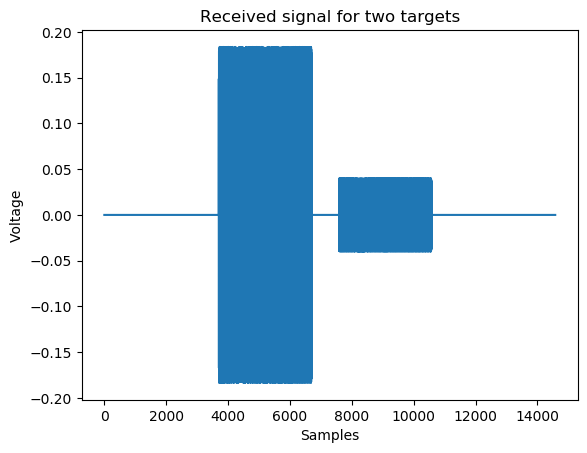

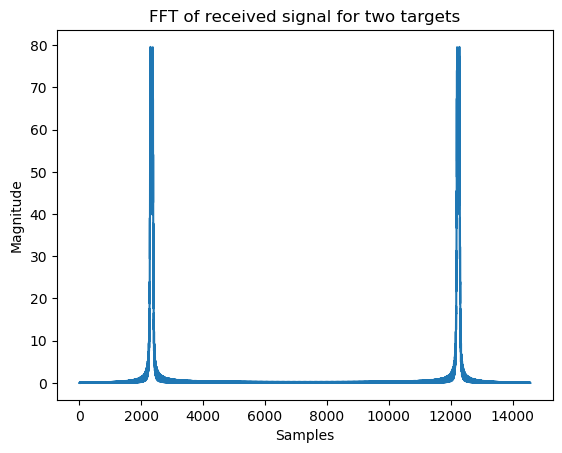

In [18]:
#second target
R2 = 5  # 5m - range to target.
td2 = 2*R2/c; # two way delay to target.
A2 = 1/R2^2; # echo voltage signal proportional to 1/R^2
v_rx = A1*cos.(2*pi*(f0*(t.-td.-td1) + 0.5*K*(t.-td.-td1).^2) ) .* rect((t.-
td.-td1)/T) + A2*cos.(2*pi*(f0*(t.-td.-td2) + 0.5*K*(t.-td.-td2).^2) ) .* rect((t.-
td.-td2)/T);

V_RX = fft(v_rx);

figure() # Create a new figure
plot(v_rx) # Put time on x-axis
title("Received signal for two targets")
xlabel("Samples");
ylabel("Voltage");

figure() # Create a new figure
plot(abs.(V_RX) )
title("FFT of received signal for two targets");
xlabel("Samples");
ylabel("Magnitude");

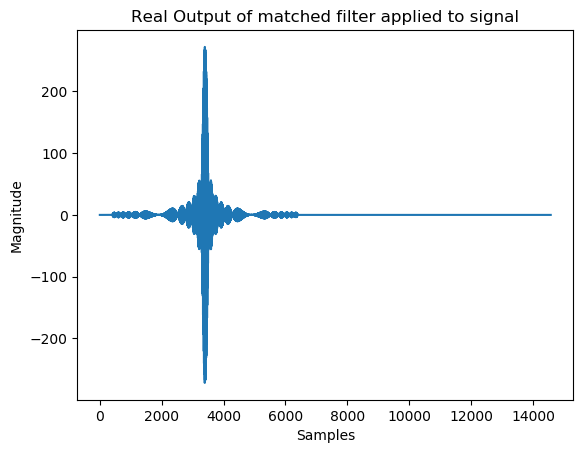

In [8]:
#STEP 3: Matched filtering

H = conj( V_TX);
V_MF = H.*V_RX;
v_mf = ifft(V_MF);

figure() # Create a new figure
plot(real(v_mf));
title("Real Output of matched filter applied to signal")
xlabel("Samples");
ylabel("Magnitude");

#Negligble Imaginary part <1E-14

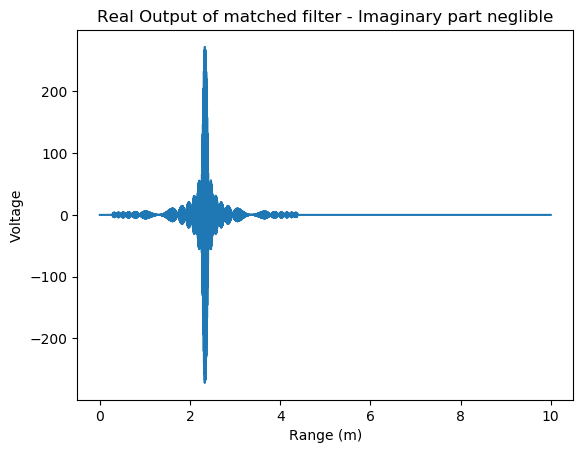

In [9]:
v_mf = real(v_mf);
figure() # Create a new figure
plot(r,v_mf) # To see the detail – zoom in to have a good look.
title("Real Output of matched filter - Imaginary part neglible")
xlabel("Range (m)");
ylabel("Voltage");


# Take note of the shape of the envelope, as well as the internal detail.
# effect of pulse compression

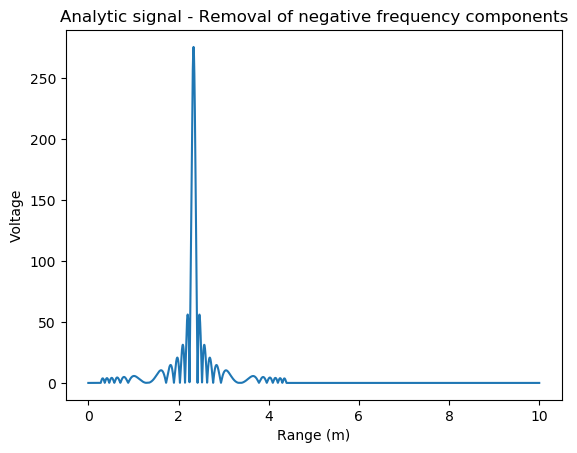

In [10]:
#STEP 4: Forming an analytic signal

V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);
V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);
if mod(N,2)==0 # case N even
 neg_freq_range = Int(N/2):N; # Define range of “neg-freq” components
else # case N odd
 neg_freq_range = Int((N+1)/2):N;
end
V_ANAL[neg_freq_range] .= 0; # Zero out neg components in 2nd half of array.
v_anal = ifft(V_ANAL);

figure() # Create a new figure
plot(r,abs.(v_anal)) # To see the magnitude – zoom in to have a good look.
title("Analytic signal - Removal of negative frequency components")
xlabel("Range (m)");
ylabel("Voltage");

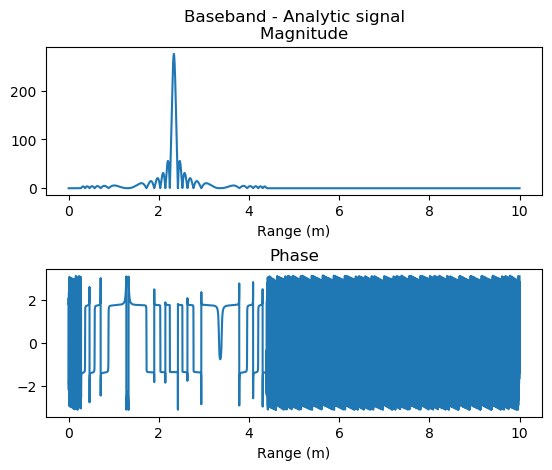

In [11]:
#STEP 5: Translating the signal to baseband

j=im; # Assign j as sqrt(-1) (“im” in julia)
v_bb = v_anal.*exp.(-j*2*pi*f0*t);

fig = figure() # Create a new figure

subplot(2,1,1)
plot(r,abs.(v_bb))
title("Baseband - Analytic signal
    Magnitude")
xlabel("Range (m)");
fig.subplots_adjust(hspace=.5)
subplot(2,1,2)
plot(r,angle.(v_bb))
title("
Phase")
xlabel("Range (m)");


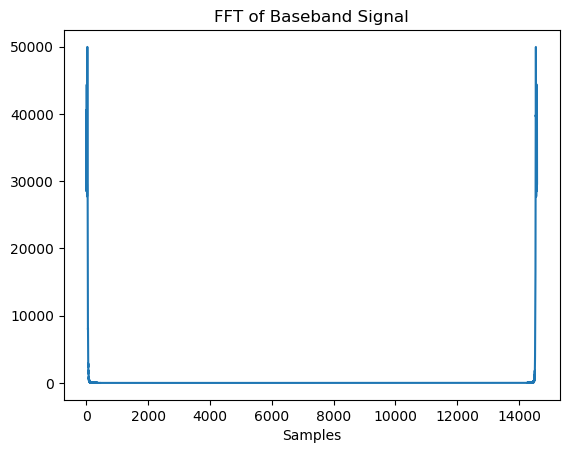

In [12]:
V_BB = fft(v_bb); 
figure() # Create a new figure
plot(abs.(V_BB))
title("FFT of Baseband Signal");
xlabel("Samples");

In [13]:
#STEP 6: Adding noise to the simulation

sigma = 0.2 * A1;
noise_signal = sigma * randn(N);

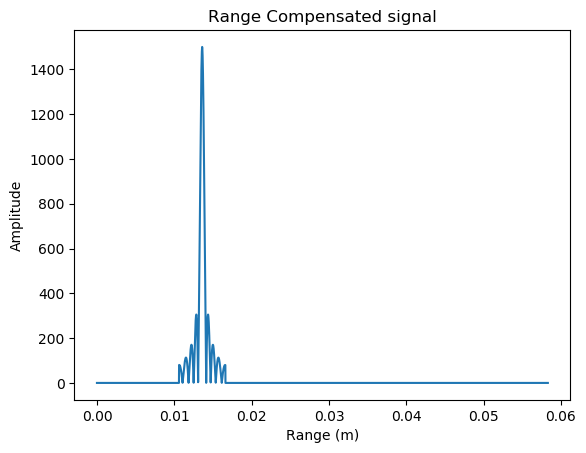

In [14]:
#Part 7

# Define a simple a rect() function which returns for -0.25<=t<=0.25 or 0.
# The function will work if t is an array of values.
rect2(t) = (abs.(t) .<= 0.25)*1.0
R1_func = R1^2 
R2_func = R2^2 
v_rc = v_bb.* rect2.((t.-td1)/T)*R1_func .+ v_bb.* rect2.((t .-td2)/T)*R2_func;

figure() # Create a new figure
plot(t,real(abs.(v_rc)));    
title("Range Compensated signal")
xlabel("Range (m)");
ylabel("Amplitude");

In [15]:
Empty  = zeros(10*N)
p = floor(Int32, N/2)
V_RC_Padded = fft(v_rc)
temp = vcat(V_RC_Padded[1:p-1], Empty)
X = vcat(temp, V_RC_Padded[p:end])
x = ifft(X);
time_new = collect(0:dt/11.004:t_max);
range_new = c*time_new/2;

figure()
plot(real(abs.(x)));
title("Zero-padding Baseband signal with finer sample spacing")
xlabel("Sample");
ylabel("Amplitude");

using PyPlot;
figure()
plot(time_new,real(abs.(x)));
title("Zero-padding Baseband signal with finer sample spacing")
xlabel("Time (s)");
ylabel("Amplitude");


figure()
plot(range_new,real(abs.(x)));
title("Zero-padding Baseband signal with finer sample spacing")
xlabel("Range (m)");
ylabel("Amplitude");

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\MikeR\.julia\packages\PyCall\ttONZ\src\pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('x and y must have same first dimension, but have shapes (160409,) and (160358,)',)
  File "C:\Users\MikeR\.julia\conda\3\lib\site-packages\matplotlib\pyplot.py", line 2795, in plot
    is not None else {}), **kwargs)
  File "C:\Users\MikeR\.julia\conda\3\lib\site-packages\matplotlib\axes\_axes.py", line 1666, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "C:\Users\MikeR\.julia\conda\3\lib\site-packages\matplotlib\axes\_base.py", line 225, in __call__
    yield from self._plot_args(this, kwargs)
  File "C:\Users\MikeR\.julia\conda\3\lib\site-packages\matplotlib\axes\_base.py", line 391, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "C:\Users\MikeR\.julia\conda\3\lib\site-packages\matplotlib\axes\_base.py", line 270, in _xy_from_xy
    "have shapes {} and {}".format(x.shape, y.shape))
